# PROJECT DESCRIPTION

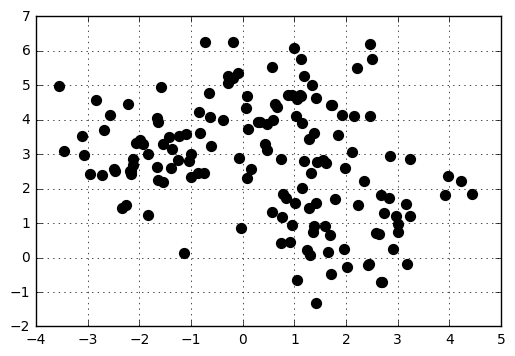

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = make_blobs (n_samples = 150, n_features = 2,
                 centers = 3, cluster_std = 1,
                 random_state=0)

plt.scatter(x[:,0], x[:,1], c="black", marker='o', s=50, cmap='rainbow')
plt.grid()

In [2]:
from sklearn.cluster import KMeans 
km = KMeans (n_clusters = 3, init = 'random', n_init = 10,
            max_iter = 300, tol = 0.0001, random_state = 0)
y_km = km.fit_predict(x)


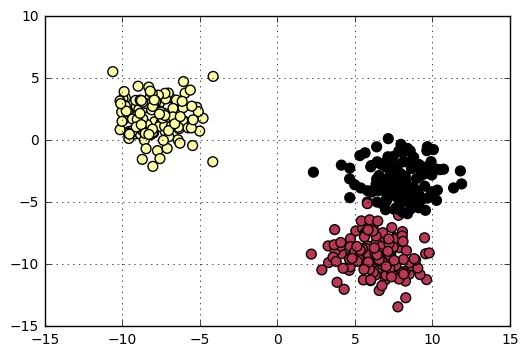

In [3]:
x1,y1 = make_blobs (n_samples = 400, n_features = 2,
                 centers = 3, cluster_std = 1.5,
                 random_state=6)
#(np.random.shuffle(y1))
plt.scatter(x1[:,0], x1[:,1],c=y1, marker='o', s=50, cmap='inferno')
plt.grid()

# K-Means

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
college = pd.read_csv("College.csv",index_col=0)
college.head()
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [6]:
from sklearn.cluster import KMeans 

km = KMeans (n_clusters = 2, init = 'k-means++', n_init = 20,
             max_iter = 300, tol = 0.0001, random_state = 0)
# ~ PARAMATERS ~ 
# n_clusters: for k=2
# init: 'random' or 'k-means++'(used to improve initial assignments)
# n_init:to run the algorith 20 times and choose the iteration
#           with the lowest local distance (from centroids)
# max_iter: to restrict the number if iterations before 
#           convergence (to improve processing time )
# tol: level of tolerance (distance) to declare convergace
# random_state: to produce consitante results given that 
#               KMeans starts with ramdonly assignments 

model_km = km.fit_predict(college.iloc[:,1:])

In [7]:
def conv(private):
    if private =='Yes': return 1
    else: return 0 

college['cluster'] = college['Private'].apply(conv)

In [8]:
km.fit(college.iloc[:,1:])
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(college['cluster'],model_km))
print('\n')
print(classification_report(college['cluster'],model_km,
                            target_names=['*Yes*','*No*']))

[[138  74]
 [531  34]]


             precision    recall  f1-score   support

      *Yes*       0.21      0.65      0.31       212
       *No*       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



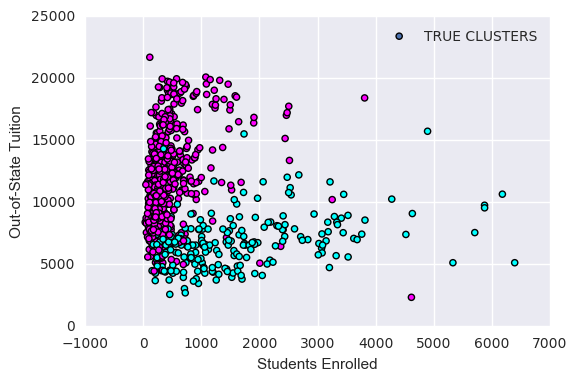

In [9]:
# Now, let's visually compared our 'true' clusters with K-Means 'clusters'.

plt.scatter(college['Enroll'],college['Outstate'], 
            c=college['cluster'],cmap='cool',linewidths=1, 
            label='TRUE CLUSTERS')
plt.xlabel('Students Enrolled')
plt.ylabel('Out-of-State Tuition')
plt.legend()

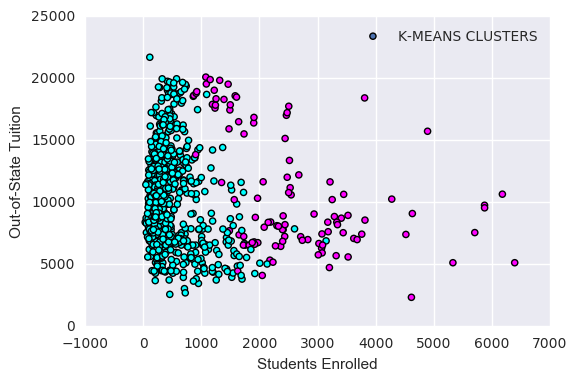

In [10]:
plt.scatter(college['Enroll'],college['Outstate'], 
            c=model_km,cmap='cool',linewidths=1,
            label='K-MEANS CLUSTERS')
plt.xlabel('Students Enrolled')
plt.ylabel('Out-of-State Tuition')
plt.legend() 

In [11]:
km.n_clusters

2